## __TRABAJO PRÁCTICO 1__: *Análisis inicial de valores*

### Análisis realizado
- [df_train_values](#link_1)
- [df_train_labels](#link_2)
- [Análisis de valores por columna](#link_3)
     - [building_id](#link_4)
     - [geo_level](#link_5)
     - [count_floors_pre_eq](#link_6)
     - [age](#link_7)
     - [area_percentage](#link_8)
     - [height_percentage](#link_9)
     - [land_surface_condition](#link_10)
     - [foundation_type](#link_11)
     - [roof_type](#link_12)
     - [ground_floor_type](#link_13)
     - [other_floor_type](#link_14)
     - [position](#link_15)
     - [has_superstructure..](#link_16)
     - [legal_ownership_status](#link_17)
     - [count_families](#link_18)
     - [has_secondary..](#link_19)
     - [damage_grade](#link_20)
- [Merge de los DataFrames](#link_21)


### Importamos las librerías

In [1]:
# importacion general de librerias y de visualizacion (matplotlib y seaborn)
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs

import warnings
warnings.filterwarnings('ignore')

### Importamos los datos

In [2]:
df_train_values = pd.read_csv('../datasets/train_values.csv')
df_train_labels = pd.read_csv('../datasets/train_labels.csv')

### **df_train_values**<a id='link_1'></a>

In [3]:
df_train_values.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 39 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             260601 non-null  int64 
 1   geo_level_1_id                          260601 non-null  int64 
 2   geo_level_2_id                          260601 non-null  int64 
 3   geo_level_3_id                          260601 non-null  int64 
 4   count_floors_pre_eq                     260601 non-null  int64 
 5   age                                     260601 non-null  int64 
 6   area_percentage                         260601 non-null  int64 
 7   height_percentage                       260601 non-null  int64 
 8   land_surface_condition                  260601 non-null  object
 9   foundation_type                         260601 non-null  object
 10  roof_type                               260601 non-null 

In [4]:
df_train_values.isnull().sum().sum()

0

#### **#** df_train_values no tiene valores nulos.

#### Cambiamos los tipos categóricos y booleanos

In [5]:
df_train_values=df_train_values.astype({
                        'land_surface_condition':'category',
                        'foundation_type':'category',
                        'roof_type':'category',
                        'ground_floor_type':'category',
                        'other_floor_type':'category',
                        'position':'category',
                        'plan_configuration':'category',
    
                        'has_superstructure_adobe_mud':'bool',
                        'has_superstructure_mud_mortar_stone':'bool',
                        'has_superstructure_stone_flag':'bool',
                        'has_superstructure_cement_mortar_stone':'bool', 
                        'has_superstructure_mud_mortar_brick':'bool', 
                        'has_superstructure_cement_mortar_brick':'bool', 
                        'has_superstructure_timber':'bool', 
                        'has_superstructure_bamboo':'bool', 
                        'has_superstructure_rc_non_engineered':'bool', 
                        'has_superstructure_rc_engineered':'bool', 
                        'has_superstructure_other':'bool',
                        
                        'legal_ownership_status':'category',

                        'has_secondary_use':'bool',
                        'has_secondary_use_agriculture':'bool', 
                        'has_secondary_use_hotel':'bool', 
                        'has_secondary_use_rental':'bool', 
                        'has_secondary_use_institution':'bool', 
                        'has_secondary_use_school':'bool',
                        'has_secondary_use_industry':'bool',
                        'has_secondary_use_health_post':'bool',
                        'has_secondary_use_gov_office':'bool',
                        'has_secondary_use_use_police':'bool',
                        'has_secondary_use_other':'bool'})

In [6]:
df_train_values.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 39 columns):
 #   Column                                  Non-Null Count   Dtype   
---  ------                                  --------------   -----   
 0   building_id                             260601 non-null  int64   
 1   geo_level_1_id                          260601 non-null  int64   
 2   geo_level_2_id                          260601 non-null  int64   
 3   geo_level_3_id                          260601 non-null  int64   
 4   count_floors_pre_eq                     260601 non-null  int64   
 5   age                                     260601 non-null  int64   
 6   area_percentage                         260601 non-null  int64   
 7   height_percentage                       260601 non-null  int64   
 8   land_surface_condition                  260601 non-null  category
 9   foundation_type                         260601 non-null  category
 10  roof_type                       

#### Uso de memoria (df_train_values)

In [7]:
1 - (25.4 / 77.5)

0.6722580645161291

#### **#** Con los cambios de tipos de datos el uso de memoria se redujo un 67%.

---------------------------------------------------------------------------------------------------

### **df_train_labels**<a id='link_2'></a>

In [8]:
df_train_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype
---  ------        --------------   -----
 0   building_id   260601 non-null  int64
 1   damage_grade  260601 non-null  int64
dtypes: int64(2)
memory usage: 4.0 MB


In [9]:
df_train_labels.shape

(260601, 2)

#### **#** df_train_labels no tiene valores nulos.

In [10]:
df_train_labels = df_train_labels.astype({'damage_grade':'category'})

In [11]:
df_train_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   building_id   260601 non-null  int64   
 1   damage_grade  260601 non-null  category
dtypes: category(1), int64(1)
memory usage: 2.2 MB


#### Uso de memoria (df_train_labels)

In [12]:
1 - (2.2 / 4)

0.44999999999999996

#### **#** Con los cambios de tipos de datos el uso de memoria se redujo un 45%

---------------------------------------------------------------------------------------------------

### **Análisis de valores por columna**<a id='link_3'></a>

#### **building_id**<a id='link_4'></a>

In [13]:
df_train_values['building_id'].value_counts().sum()

260601

In [14]:
df_train_values['building_id'].max()

1052934

In [15]:
df_train_values['building_id'].min()

4

**building_id:** no hay valores de building_id repetidos.

---------------------------------------------------------------------------------------------------

#### **geo_level**<a id='link_5'></a>

In [16]:
df_train_values['geo_level_1_id'].min()

0

In [17]:
df_train_values['geo_level_1_id'].max()

30

In [18]:
df_train_values['geo_level_2_id'].min()

0

In [19]:
df_train_values['geo_level_2_id'].max()

1427

In [20]:
df_train_values['geo_level_3_id'].min()

0

In [21]:
df_train_values['geo_level_3_id'].max()

12567

In [22]:
df_train_values['geo_level_3_id'].value_counts()

633      651
9133     647
621      530
11246    470
2005     466
        ... 
6095       1
3599       1
7886       1
9994       1
11851      1
Name: geo_level_3_id, Length: 11595, dtype: int64

**geo_level:** los valores coinciden con los detallados en el enunciado.

---------------------------------------------------------------------------------------------------

#### **count_floors_pre_eq**<a id='link_6'></a>

In [23]:
df_train_values['count_floors_pre_eq'].describe()

count             260,601.00
mean                    2.13
std                     0.73
min                     1.00
25%                     2.00
50%                     2.00
75%                     2.00
max                     9.00
Name: count_floors_pre_eq, dtype: float64

In [24]:
df_train_values['count_floors_pre_eq'].value_counts(normalize='true')

2                   0.60
3                   0.21
1                   0.16
4                   0.02
5                   0.01
6                   0.00
7                   0.00
9                   0.00
8                   0.00
Name: count_floors_pre_eq, dtype: float64

In [25]:
df_train_values['count_floors_pre_eq'].value_counts().iloc[0:3,].sum()/260601

0.9696087121691782

Text(0.5, 0, 'Pisos')

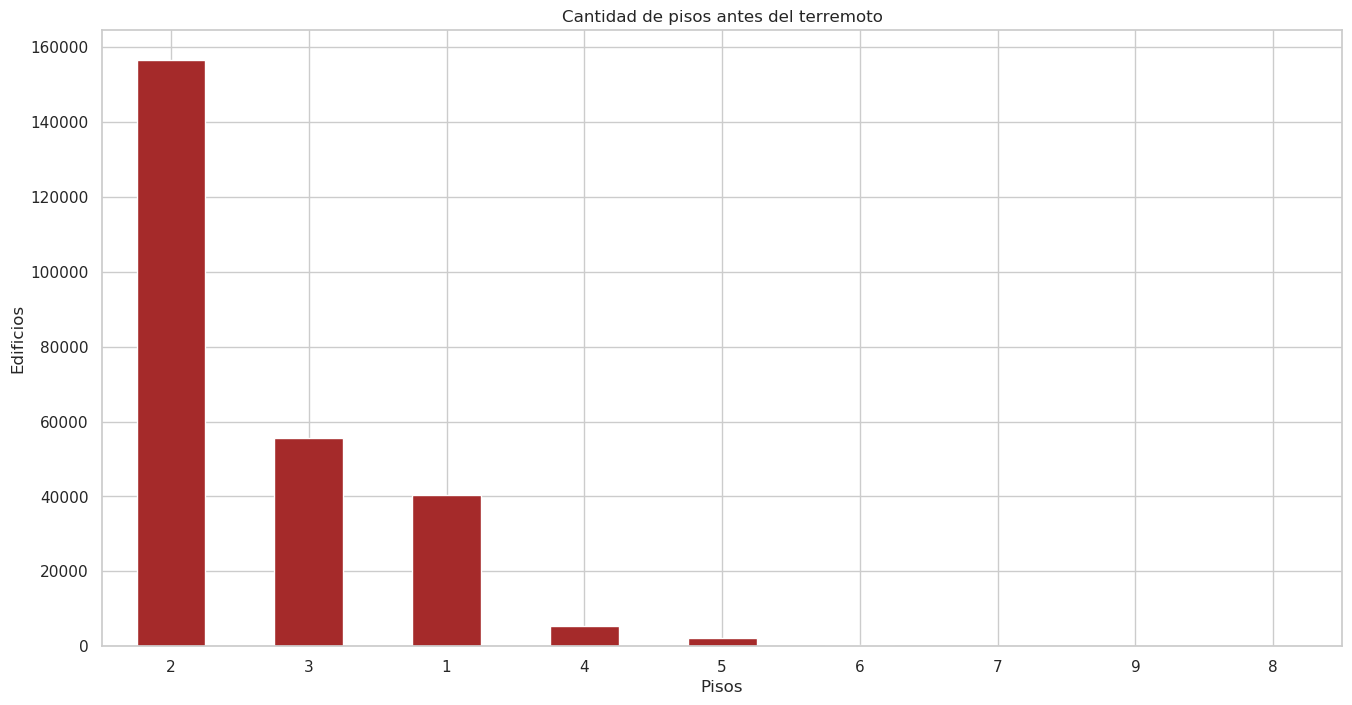

In [26]:
df_train_values['count_floors_pre_eq'].value_counts().plot(kind='bar',figsize=(16,8),
                            rot=0,title='Cantidad de pisos antes del terremoto',color='brown');
ax=plt.gca()
ax.set_ylabel('Edificios');
ax.set_xlabel('Pisos')

**count_floors_pre_eq:** la gran mayoría de los edificios eran de 2 pisos, y en general era una ciudad de edificaciones bajas, el 97% no superaba los 3 pisos.

---------------------------------------------------------------------------------------------------

####  **age**<a id='link_7'></a>

In [27]:
df_train_values['age'].describe()

count             260,601.00
mean                   26.54
std                    73.57
min                     0.00
25%                    10.00
50%                    15.00
75%                    30.00
max                   995.00
Name: age, dtype: float64

In [28]:
df_train_values['age'].value_counts(normalize='true')

10                    0.15
15                    0.14
5                     0.13
20                    0.12
0                     0.10
25                    0.09
30                    0.07
35                    0.04
40                    0.04
50                    0.03
45                    0.02
60                    0.01
80                    0.01
55                    0.01
70                    0.01
995                   0.01
100                   0.01
65                    0.00
90                    0.00
85                    0.00
75                    0.00
95                    0.00
120                   0.00
150                   0.00
200                   0.00
110                   0.00
105                   0.00
125                   0.00
115                   0.00
140                   0.00
130                   0.00
180                   0.00
160                   0.00
170                   0.00
175                   0.00
135                   0.00
145                   0.00
1

In [29]:
df_train_values['age'].value_counts().iloc[0:9,].sum()/260601

0.8844517097018046

Text(0.5, 1.0, 'Antigüedad de los edificios')

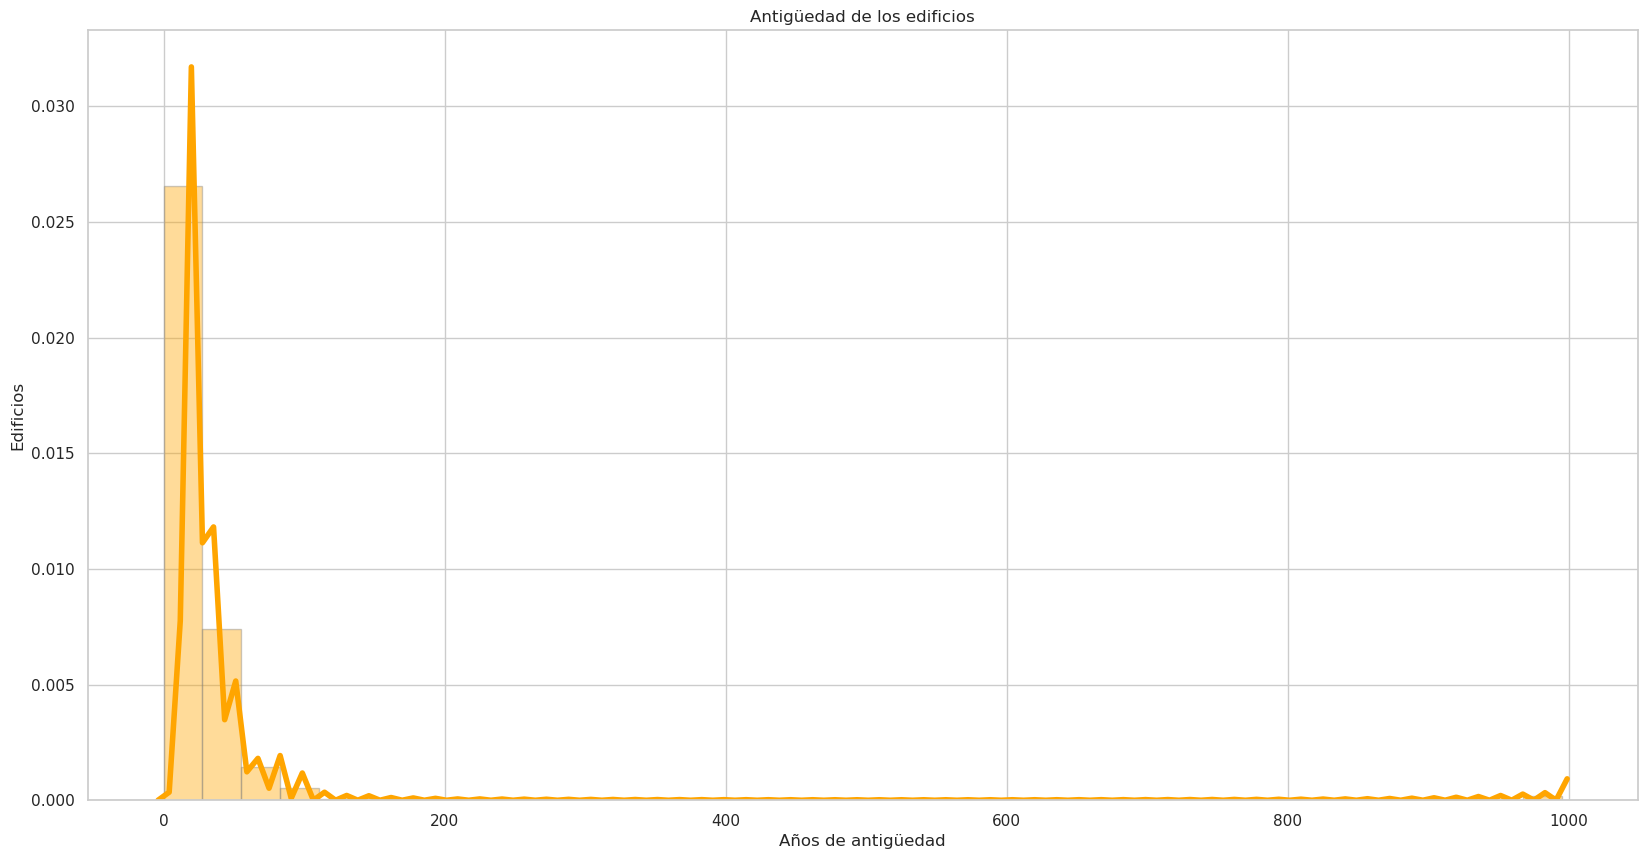

In [30]:
sns.distplot(df_train_values['age'], hist=True, kde=True, 
             bins=int(180/5), color = 'orange', 
             hist_kws={'edgecolor':'grey'},
             kde_kws={'linewidth': 4})

plt.xlabel('Años de antigüedad')
plt.ylabel('Edificios')
plt.title('Antigüedad de los edificios')

**age:** el 88% de los edificios tenia cuarenta años o menos.
**Observación:** hay 1.390 edificios con una antiguedad cercana a 1.000 años, cuando el resto no supera los 200 años de antiguedad.

---------------------------------------------------------------------------------------------------

#### **area_percentage**<a id='link_8'></a>

In [31]:
df_train_values['area_percentage'].describe()

count             260,601.00
mean                    8.02
std                     4.39
min                     1.00
25%                     5.00
50%                     7.00
75%                     9.00
max                   100.00
Name: area_percentage, dtype: float64

In [32]:
df_train_values['area_percentage'].value_counts(normalize='true').head(20)

6                    0.16
7                    0.14
5                    0.13
8                    0.11
9                    0.09
4                    0.07
10                   0.06
11                   0.05
3                    0.05
12                   0.03
13                   0.02
14                   0.02
15                   0.01
2                    0.01
16                   0.01
17                   0.01
19                   0.01
18                   0.01
20                   0.00
23                   0.00
Name: area_percentage, dtype: float64

In [33]:
df_train_values['area_percentage'].value_counts().iloc[0:10,].sum()/260601

0.8837533240471065

Text(0.5, 1.0, 'Porcentaje de superficie ocupada por edificio')

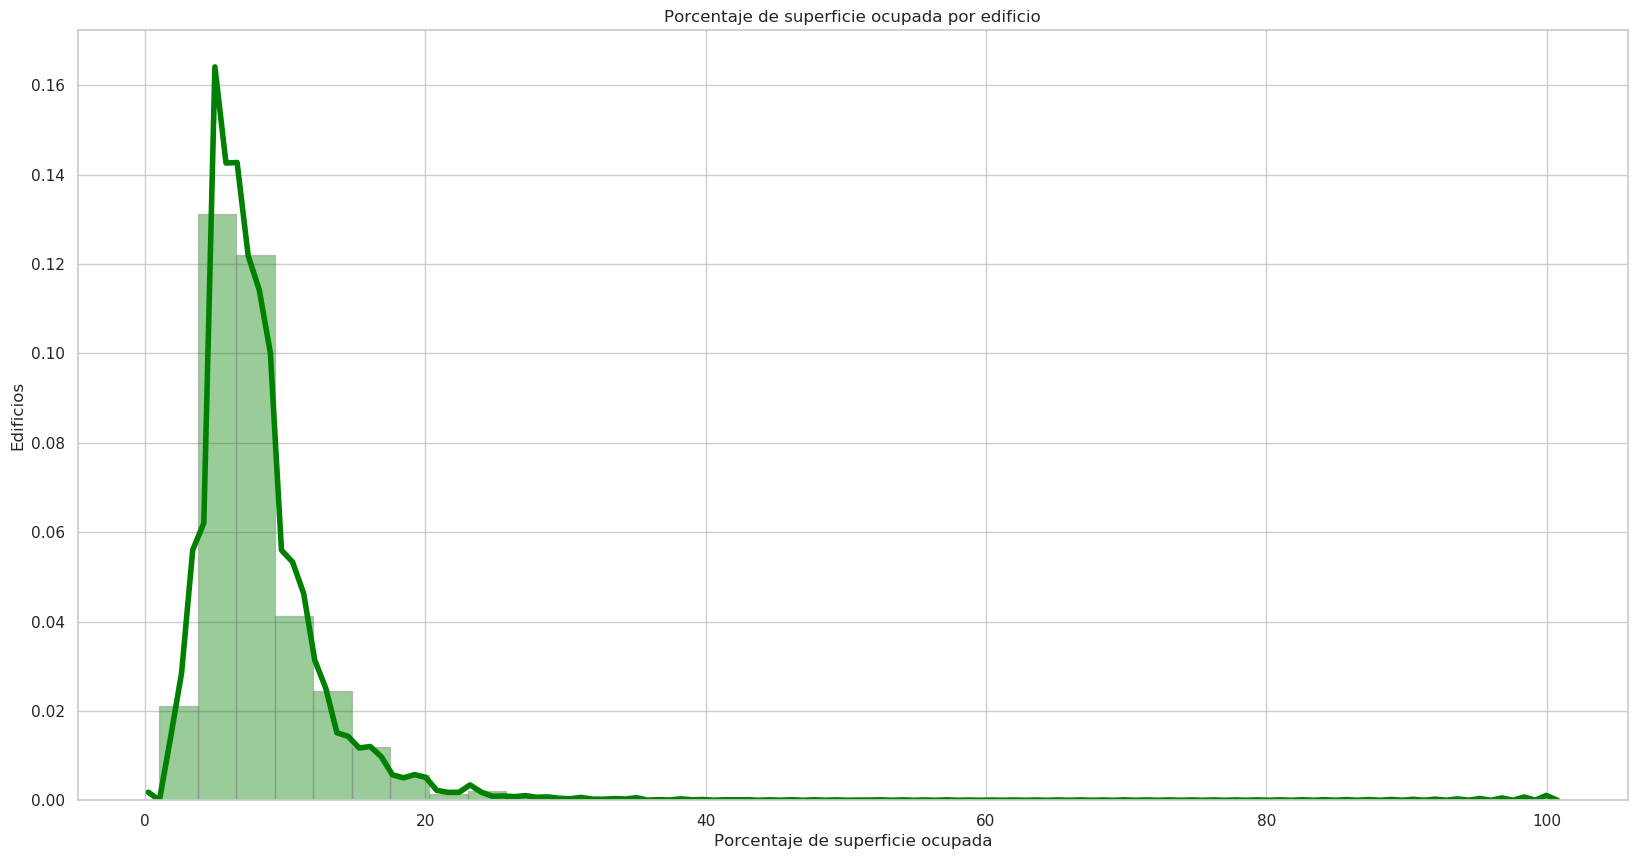

In [34]:
sns.distplot(df_train_values['area_percentage'], hist=True, kde=True, 
             bins=int(180/5), color = 'Green', 
             hist_kws={'edgecolor':'grey'},
             kde_kws={'linewidth': 4})

plt.xlabel('Porcentaje de superficie ocupada')
plt.ylabel('Edificios')
plt.title('Porcentaje de superficie ocupada por edificio')

**area_percentage:** el 88% de los edificios ocupaba el 12% del area o menos.

---------------------------------------------------------------------------------------------------

#### **height_percentage**<a id='link_9'></a>

In [35]:
df_train_values['height_percentage'].describe()

count             260,601.00
mean                    5.43
std                     1.92
min                     2.00
25%                     4.00
50%                     5.00
75%                     6.00
max                    32.00
Name: height_percentage, dtype: float64

In [36]:
df_train_values['height_percentage'].value_counts(normalize='true')

5                    0.30
6                    0.18
4                    0.14
7                    0.14
3                    0.10
8                    0.05
2                    0.04
9                    0.02
10                   0.02
11                   0.00
12                   0.00
13                   0.00
15                   0.00
16                   0.00
32                   0.00
18                   0.00
14                   0.00
20                   0.00
21                   0.00
23                   0.00
17                   0.00
19                   0.00
24                   0.00
25                   0.00
26                   0.00
28                   0.00
31                   0.00
Name: height_percentage, dtype: float64

In [37]:
df_train_values['height_percentage'].value_counts().iloc[0:9,].sum()/260601

0.9871412619291561

Text(0.5, 1.0, 'Altura por cantidad de edificios')

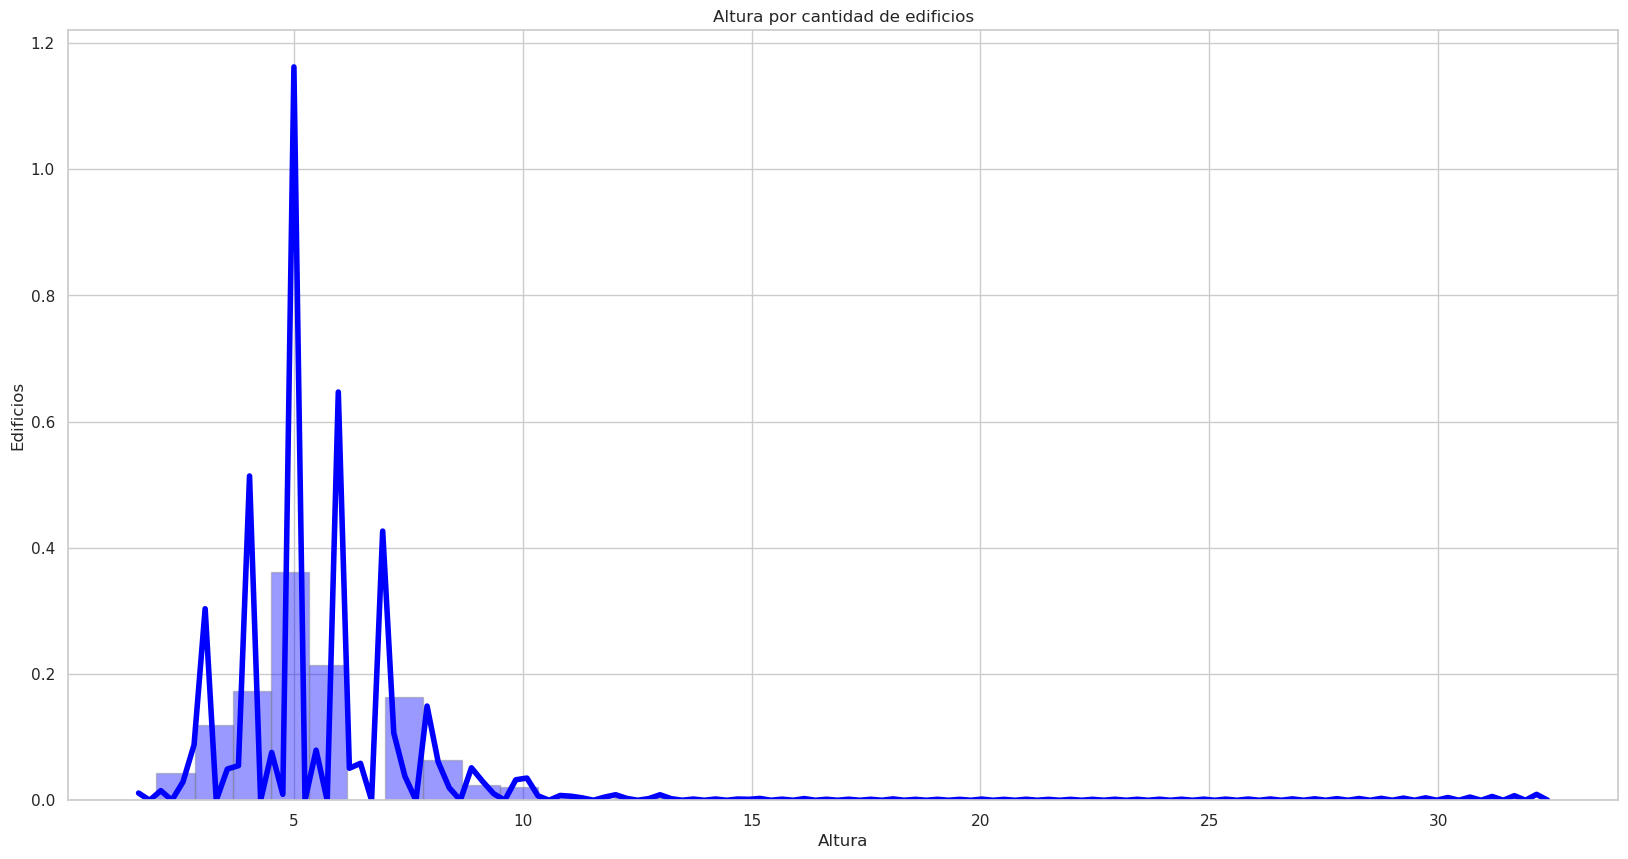

In [38]:
sns.distplot(df_train_values['height_percentage'], hist=True, kde=True, 
             bins=int(180/5), color = 'Blue', 
             hist_kws={'edgecolor':'grey'},
             kde_kws={'linewidth': 4})

plt.xlabel('Altura')
plt.ylabel('Edificios')
plt.title('Altura por cantidad de edificios')

**height_percentage:** el 99% de los edificios tenia menos de 10 mts. de altura, lo cual tiene sentido con la cantidad de pisos.

---------------------------------------------------------------------------------------------------

#### **land_surface_condition**<a id='link_10'></a>

In [39]:
df_train_values['land_surface_condition'].value_counts()

t    216757
n     35528
o      8316
Name: land_surface_condition, dtype: int64

In [40]:
df_train_values['land_surface_condition'].value_counts(normalize='true')

t                   0.83
n                   0.14
o                   0.03
Name: land_surface_condition, dtype: float64

**land_surface_condition:** hay una mayoría importante del valor **t** (83%), mientras que el menor es **o** (3%).

---------------------------------------------------------------------------------------------------

#### **foundation_type**<a id='link_11'></a>

In [41]:
df_train_values['foundation_type'].value_counts()

r    219196
w     15118
u     14260
i     10579
h      1448
Name: foundation_type, dtype: int64

In [42]:
df_train_values['foundation_type'].value_counts(normalize='true')

r                   0.84
w                   0.06
u                   0.05
i                   0.04
h                   0.01
Name: foundation_type, dtype: float64

**foundation_type:** hay una mayoría importante del valor **r** (84%), mientras que el menor es **h** (1%).

---------------------------------------------------------------------------------------------------

#### **roof_type**<a id='link_12'></a>

In [43]:
df_train_values['roof_type'].value_counts()

n    182842
q     61576
x     16183
Name: roof_type, dtype: int64

In [44]:
df_train_values['roof_type'].value_counts(normalize='true')

n                   0.70
q                   0.24
x                   0.06
Name: roof_type, dtype: float64

**roof_type:** hay una mayoría del valor **n** (70%), mientras que el menor es **x** (6%).

---------------------------------------------------------------------------------------------------

#### **ground_floor_type**<a id='link_13'></a>

In [45]:
df_train_values['ground_floor_type'].value_counts()

f    209619
x     24877
v     24593
z      1004
m       508
Name: ground_floor_type, dtype: int64

In [46]:
df_train_values['ground_floor_type'].value_counts(normalize='true')

f                   0.80
x                   0.10
v                   0.09
z                   0.00
m                   0.00
Name: ground_floor_type, dtype: float64

**ground_floor_type:** hay una mayoría importante del valor **f** (80%), mientras que los menores son **z** y **m** (menos del 1%).

---------------------------------------------------------------------------------------------------

#### **other_floor_type**<a id='link_14'></a>

In [47]:
df_train_values['other_floor_type'].value_counts()

q    165282
x     43448
j     39843
s     12028
Name: other_floor_type, dtype: int64

In [48]:
df_train_values['other_floor_type'].value_counts(normalize='true')

q                   0.63
x                   0.17
j                   0.15
s                   0.05
Name: other_floor_type, dtype: float64

**other_floor_type:** hay una mayoría del valor **q** (63%), mientras que el menor es **s** (5%).

---------------------------------------------------------------------------------------------------

#### **position**<a id='link_15'></a>

In [49]:
df_train_values['position'].value_counts()

s    202090
t     42896
j     13282
o      2333
Name: position, dtype: int64

In [50]:
df_train_values['position'].value_counts(normalize='true')

s                   0.78
t                   0.16
j                   0.05
o                   0.01
Name: position, dtype: float64

**position:** hay una mayoría del valor **s** (78%), mientras que el menor es **o** (1%).

---------------------------------------------------------------------------------------------------

#### **plan_configuration**<a id='link_15'></a>

In [51]:
df_train_values['plan_configuration'].value_counts()

d    250072
q      5692
u      3649
s       346
c       325
a       252
o       159
m        46
n        38
f        22
Name: plan_configuration, dtype: int64

In [52]:
df_train_values['plan_configuration'].value_counts(normalize='true')

d                   0.96
q                   0.02
u                   0.01
s                   0.00
c                   0.00
a                   0.00
o                   0.00
m                   0.00
n                   0.00
f                   0.00
Name: plan_configuration, dtype: float64

**plan_configuration:** hay una mayoría importante del valor **d** (96%), mientras que la mayoria del resto de los valores no alcanza el 1%.

---------------------------------------------------------------------------------------------------

#### **has_superstructure**<a id='link_16'></a>

In [53]:
df_has_superstructure = df_train_values[[
                    'has_superstructure_adobe_mud',
                    'has_superstructure_mud_mortar_stone',
                    'has_superstructure_stone_flag',
                    'has_superstructure_cement_mortar_stone',
                    'has_superstructure_mud_mortar_brick',
                    'has_superstructure_cement_mortar_brick',
                    'has_superstructure_timber',
                    'has_superstructure_bamboo',
                    'has_superstructure_rc_non_engineered',
                    'has_superstructure_rc_engineered',
                    'has_superstructure_other'   ]]

In [54]:
df_has_superstructure.head()

,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other
0,True,True,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,False
3,False,True,False,False,False,False,True,True,False,False,False
4,True,False,False,False,False,False,False,False,False,False,False


In [55]:
df_has_superstructure.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 11 columns):
 #   Column                                  Non-Null Count   Dtype
---  ------                                  --------------   -----
 0   has_superstructure_adobe_mud            260601 non-null  bool 
 1   has_superstructure_mud_mortar_stone     260601 non-null  bool 
 2   has_superstructure_stone_flag           260601 non-null  bool 
 3   has_superstructure_cement_mortar_stone  260601 non-null  bool 
 4   has_superstructure_mud_mortar_brick     260601 non-null  bool 
 5   has_superstructure_cement_mortar_brick  260601 non-null  bool 
 6   has_superstructure_timber               260601 non-null  bool 
 7   has_superstructure_bamboo               260601 non-null  bool 
 8   has_superstructure_rc_non_engineered    260601 non-null  bool 
 9   has_superstructure_rc_engineered        260601 non-null  bool 
 10  has_superstructure_other                260601 non-null  bool 
dtype

In [56]:
df_has_superstructure['Suma_structure'] = df_has_superstructure.sum(axis=1)

In [57]:
df_has_superstructure['Suma_structure'].value_counts()

1    176016
2     57838
3     20210
4      4925
5      1259
6       314
7        35
8         4
Name: Suma_structure, dtype: int64

In [58]:
df_has_mas_superstruct=df_train_values[(df_has_superstructure['Suma_structure'] > 1)]

In [59]:
df_has_mas_superstruct

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,...,False,False,False,False,False,False,False,False,False,False
3,590882,22,418,10694,2,10,6,5,t,r,...,False,False,False,False,False,False,False,False,False,False
7,475515,20,323,12236,2,0,8,6,t,w,...,False,False,False,False,False,False,False,False,False,False
8,441126,0,757,7219,2,15,8,6,t,r,...,False,False,False,False,False,False,False,False,False,False
10,7962,17,1119,12188,2,20,9,6,t,r,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260583,192421,7,322,2843,2,10,6,6,t,r,...,False,False,False,False,False,False,False,False,False,False
260585,722577,6,744,10556,2,45,17,5,t,r,...,False,False,False,False,False,False,False,False,False,False
260587,603159,8,696,4513,3,20,7,9,t,r,...,True,False,False,False,False,False,False,False,False,False
260590,695987,20,922,10283,2,5,7,5,t,r,...,False,False,False,False,False,False,False,False,False,False


In [60]:
df_has_mas_superstruct.iloc[:,15:26]

,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other
0,True,True,False,False,False,False,False,False,False,False,False
3,False,True,False,False,False,False,True,True,False,False,False
7,False,False,False,False,False,True,True,False,False,False,False
8,False,True,False,False,False,False,True,False,False,False,False
10,False,True,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
260583,True,True,False,False,False,False,True,False,False,False,False
260585,False,True,False,False,False,False,True,False,False,False,False
260587,False,True,False,False,False,False,True,False,False,False,False
260590,False,False,True,False,False,False,True,True,False,False,False


84585 edificios tiene más de un tipo de superstructure

**has_superstructure:** 84.585 edificios tiene más de un tipo de superstructure.

---------------------------------------------------------------------------------------------------

#### **legal_ownership_status**<a id='link_17'></a>

In [61]:
df_train_values['legal_ownership_status'].value_counts()

v    250939
a      5512
w      2677
r      1473
Name: legal_ownership_status, dtype: int64

In [62]:
df_train_values['legal_ownership_status'].value_counts(normalize='true')

v                   0.96
a                   0.02
w                   0.01
r                   0.01
Name: legal_ownership_status, dtype: float64

**legal_ownership_status:** hay una mayoría importante del valor **v** (96%).

---------------------------------------------------------------------------------------------------

#### **count_families**<a id='link_18'></a>

In [63]:
df_train_values['count_families'].describe()

count             260,601.00
mean                    0.98
std                     0.42
min                     0.00
25%                     1.00
50%                     1.00
75%                     1.00
max                     9.00
Name: count_families, dtype: float64

In [64]:
len(df_train_values.loc[df_train_values['count_families']==0,:])

20862

In [65]:
len(df_train_values.loc[df_train_values['count_families']==9,:])

4

In [66]:
len(df_train_values.loc[df_train_values['count_families']==1,:])

226115

**count_families:** en su mayoría, la cantidad de familias por edicicio es **1**.

---------------------------------------------------------------------------------------------------

#### **has_secondary**<a id='link_19'></a>

In [67]:
df_has_secondary = df_train_values[[
                    'has_secondary_use',
                    'has_secondary_use_agriculture',
                    'has_secondary_use_hotel',
                    'has_secondary_use_rental',
                    'has_secondary_use_institution',
                    'has_secondary_use_school',
                    'has_secondary_use_industry',
                    'has_secondary_use_health_post',
                    'has_secondary_use_gov_office',
                    'has_secondary_use_use_police',
                    'has_secondary_use_other'   ]]

In [68]:
df_has_secondary.head()

,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False


In [69]:
df_has_secondary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 11 columns):
 #   Column                         Non-Null Count   Dtype
---  ------                         --------------   -----
 0   has_secondary_use              260601 non-null  bool 
 1   has_secondary_use_agriculture  260601 non-null  bool 
 2   has_secondary_use_hotel        260601 non-null  bool 
 3   has_secondary_use_rental       260601 non-null  bool 
 4   has_secondary_use_institution  260601 non-null  bool 
 5   has_secondary_use_school       260601 non-null  bool 
 6   has_secondary_use_industry     260601 non-null  bool 
 7   has_secondary_use_health_post  260601 non-null  bool 
 8   has_secondary_use_gov_office   260601 non-null  bool 
 9   has_secondary_use_use_police   260601 non-null  bool 
 10  has_secondary_use_other        260601 non-null  bool 
dtypes: bool(11)
memory usage: 2.7 MB


In [70]:
df_has_secondary_grouped = df_has_secondary.groupby(['has_secondary_use']).sum()

In [71]:
df_has_secondary_grouped

,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
has_secondary_use,,,,,,,,,,
False,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
True,"16,777.00","8,763.00","2,111.00",245.00,94.00,279.00,49.00,38.00,23.00,"1,334.00"


In [72]:
df_has_secondary_grouped.sum(axis=1)

has_secondary_use
False                   0.00
True               29,713.00
dtype: float64

Los edificios que no tiene uso secundario no tienen valores true.(OK)

In [73]:
df_has_secondary_true = df_has_secondary.loc[df_has_secondary['has_secondary_use']==1,:]

In [74]:
df_has_secondary_true.head()

,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
5,True,True,False,False,False,False,False,False,False,False,False
20,True,True,False,False,False,False,False,False,False,False,False
26,True,True,False,False,False,False,False,False,False,False,False
45,True,False,False,True,False,False,False,False,False,False,False
57,True,True,False,False,False,False,False,False,False,False,False


In [75]:
df_has_secondary_true.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29156 entries, 5 to 260593
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   has_secondary_use              29156 non-null  bool 
 1   has_secondary_use_agriculture  29156 non-null  bool 
 2   has_secondary_use_hotel        29156 non-null  bool 
 3   has_secondary_use_rental       29156 non-null  bool 
 4   has_secondary_use_institution  29156 non-null  bool 
 5   has_secondary_use_school       29156 non-null  bool 
 6   has_secondary_use_industry     29156 non-null  bool 
 7   has_secondary_use_health_post  29156 non-null  bool 
 8   has_secondary_use_gov_office   29156 non-null  bool 
 9   has_secondary_use_use_police   29156 non-null  bool 
 10  has_secondary_use_other        29156 non-null  bool 
dtypes: bool(11)
memory usage: 541.0 KB


In [76]:
del(df_has_secondary_true['has_secondary_use'])

In [77]:
df_has_secondary_true.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29156 entries, 5 to 260593
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   has_secondary_use_agriculture  29156 non-null  bool 
 1   has_secondary_use_hotel        29156 non-null  bool 
 2   has_secondary_use_rental       29156 non-null  bool 
 3   has_secondary_use_institution  29156 non-null  bool 
 4   has_secondary_use_school       29156 non-null  bool 
 5   has_secondary_use_industry     29156 non-null  bool 
 6   has_secondary_use_health_post  29156 non-null  bool 
 7   has_secondary_use_gov_office   29156 non-null  bool 
 8   has_secondary_use_use_police   29156 non-null  bool 
 9   has_secondary_use_other        29156 non-null  bool 
dtypes: bool(10)
memory usage: 512.5 KB


In [78]:
df_has_secondary_true['Suma_secondary'] = df_has_secondary_true.sum(axis=1)

In [79]:
df_has_secondary_true['Suma_secondary'].value_counts()

1    28599
2      557
Name: Suma_secondary, dtype: int64

In [80]:
df_has_secondary_true['Suma_secondary'].value_counts().sum()

29156

In [81]:
28599+(557*2)

29713

**has_secondary:** 29.156 edificios tiene uso secundario y 557 tienen más de un tipo de uso.

#### Identificamos cuales son:

In [82]:
df_has_secondary['Suma_secondary']= df_has_secondary.sum(axis=1)

In [83]:
df_has_mas_secondary=df_train_values[(df_has_secondary['Suma_secondary'] > 2)]

In [84]:
df_has_mas_secondary

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
304,462457,1,679,7499,2,40,12,5,n,r,...,True,False,False,False,False,False,False,False,False,True
1408,994094,7,4,10135,2,20,6,6,t,r,...,True,False,False,False,False,False,False,False,False,True
1593,835646,7,4,10135,3,5,16,8,t,u,...,True,False,False,False,False,False,False,False,False,True
2329,678220,21,727,1576,1,5,4,2,n,r,...,True,False,False,False,False,False,False,False,False,True
3704,425504,4,1334,4279,4,10,22,13,t,i,...,False,True,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256746,762884,20,190,3473,2,5,7,5,t,w,...,True,False,False,False,False,False,False,False,False,True
257939,790270,27,216,1243,2,0,5,6,n,r,...,True,False,False,False,False,False,False,False,False,True
258184,973644,1,14,1817,2,25,11,5,t,r,...,True,False,False,False,False,False,False,False,False,True
258755,952382,21,336,9977,2,15,6,4,t,r,...,True,False,False,False,False,False,False,False,False,True


In [85]:
df_has_mas_secondary.iloc[:,29:]

,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
304,True,False,False,False,False,False,False,False,False,True
1408,True,False,False,False,False,False,False,False,False,True
1593,True,False,False,False,False,False,False,False,False,True
2329,True,False,False,False,False,False,False,False,False,True
3704,False,True,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...
256746,True,False,False,False,False,False,False,False,False,True
257939,True,False,False,False,False,False,False,False,False,True
258184,True,False,False,False,False,False,False,False,False,True
258755,True,False,False,False,False,False,False,False,False,True


In [86]:
df_has_mas_secondary['has_secondary_use_other'].value_counts()

True    557
Name: has_secondary_use_other, dtype: int64

In [87]:
df_train_values['has_secondary_use_other'].value_counts()

False    259267
True       1334
Name: has_secondary_use_other, dtype: int64

#### **#** Los 557 casos de dos valores true en secondary use tiene uno de esos valores en la columna has_secondary_use.

---------------------------------------------------------------------------------------------------

#### **damage_grade**<a id='link_20'></a>

In [88]:
df_train_labels['damage_grade'].value_counts()

2    148259
3     87218
1     25124
Name: damage_grade, dtype: int64

In [89]:
df_train_labels['damage_grade'].value_counts(normalize='true')

2                   0.57
3                   0.33
1                   0.10
Name: damage_grade, dtype: float64

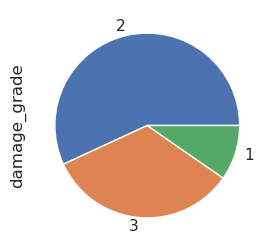

In [106]:
plot = df_train_labels['damage_grade'].value_counts(normalize='true').\
        plot.pie(subplots=True, figsize=(3, 3))

**damage_grade:** la mayoria es nivel de daño **2** (57%), mientras que la menor es **1** (10%).

---------------------------------------------------------------------------------------------------

### **Merge de los DataFrames**<a id='link_21'></a>

In [90]:
df_train_values['building_id'].value_counts().sum()

260601

In [91]:
df_train_labels['building_id'].value_counts().sum()

260601

In [92]:
df_train_values.merge(df_train_labels)['building_id'].value_counts().sum()

260601

#### Ambos DataFrames tiene iguales claves y coinciden 1 a 1.